In [1]:
import os

# Test code for bert embedding classifiers
import EmbeddingManager

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\frame

In [2]:
manager = EmbeddingManager.BERTEmbedManager()

In [3]:
result = manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'you', '-1', plot_fig=True)

(4735, 768)


KeyboardInterrupt: 

In [4]:
print(result[0])
print(result[2])
print(result[3])

2
0.12668052579605324
[(2, 0.12668052579605324), (4, 0.08567911350388131), (6, 0.08183151830472025), (8, 0.08323311410104021), (10, 0.09349062323650638), (12, 0.09777944852364222), (14, 0.10268623160003207)]


(4735, 768)
2
0.1652826040781412


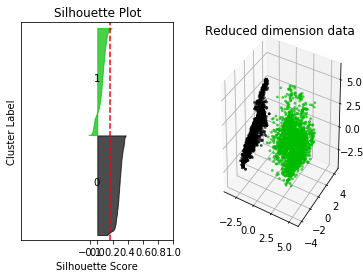

In [5]:
result = manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'you', '-12', plot_fig=True)
print(result[0])
print(result[2])

(4734, 768)


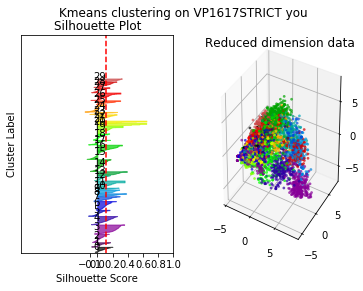

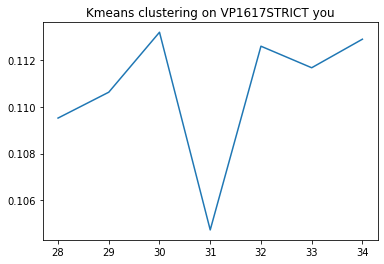

In [32]:
# you label, with save
if not os.path.isdir('./data/bert_embed_clustering/VP1617STRICT/you'):
    os.makedirs('./data/bert_embed_clustering/VP1617STRICT/you')
result = manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'you', '-1', plot_fig=True, n_clusters_range=[28,35,1])


In [82]:
# load df
manager.load_nl_df('./data/new/new_all_nl.tsv', 'VP1617STRICT')
df = manager.dfs['VP1617STRICT']

In [83]:
type(df.iloc[0]['label'])

stat = manager.on_cluster_statistics(result[1].labels_, result[4],dataset='VP1617STRICT')

In [81]:
import importlib
importlib.reload(EmbeddingManager)
manager = EmbeddingManager.BERTEmbedManager()
# manager.cluster_label_divergence(stat, show=True, title='', output='./data/bert_embed_clustering/VP1617STRICT/you')

In [11]:
# print(stat[0]['positionidx'])
for i in range(19):
    print(set(stat[i]['positionidx']))
    print(len(stat[i]['positionidx']))

{40, 41, 42, 43, 44, 13, 14, 15, 16}
189
{2}
513
{5}
260
{7}
193
{3}
467
{6}
211
{2}
455
{27, 2, 3}
268
{2}
340
{2, 3}
387
{9}
102
{33, 2, 3, 4, 5, 6, 7, 8, 37, 13, 15, 17, 19, 20}
98
{11, 12, 38, 39}
123
{4}
323
{8, 35}
152
{2}
246
{1}
42
{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 45, 48, 50, 52, 53}
267
{10, 35, 36, 37}
99


(110, 768)


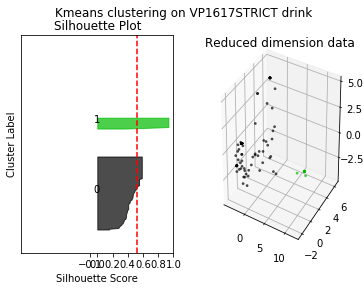

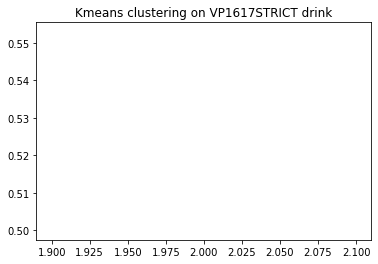

In [103]:
if not os.path.isdir('./data/bert_embed_clustering/VP1617STRICT/drink'):
    os.makedirs('./data/bert_embed_clustering/VP1617STRICT/drink')
result = manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'drink', '-1', plot_fig=True, n_clusters_range=[2,3,1])

# Divergence functionality tests

In [ ]:
manager.symmetric_kl_divergence({'x':36,'y':48,'z':16},{'x':1, 'y':1,'z':1}, add_one_smooth=False)

In [18]:
from dit.divergences import *
from dit import Distribution
a = Distribution({'x':0.36, 'y':0.48, 'z':0.16})
b = Distribution({'x':1/3, 'y':1/3, 'z':1/3})
print(jensen_shannon_divergence([a,b]))

0.03240272926100762


In [100]:
import importlib
importlib.reload(EmbeddingManager)
manager = EmbeddingManager.BERTEmbedManager()

In [25]:
p = {'x':0.36, 'y':0.48, 'z':0.16}
r = {'x':1, 'y':1, 'z':1}
q = {'x':1/3, 'y':1/3, 'z':1/3}
manager.jensen_shannon_divergence(r, q)

0.0

In [26]:
print(kullback_leibler_divergence(b,a))
print(manager.kl_divergence(q,p))

0.14059785499907917
0.1405978549990789


In [66]:
def cluster_analysis_token(tokens, dataset='VP1617STRICT', base_path='./data/bert_embed_clustering/'):
    for token in tokens:
        for i in range(-1, -13, -1):
            path = os.path.join(base_path, dataset, token, str(i))
            if not os.path.isdir(path):
                os.makedirs(path)
            result = manager.clustering_analysis_BERT_token_kmeans(dataset, token, i, plot_fig=False, n_clusters_range=[2,10,1],
                                                                   output=path)
            stat = manager.on_cluster_statistics(result[1].labels_, result[4],dataset='VP1617STRICT')
            manager.cluster_label_divergence(stat, show=False, title='Group-wise Divergence on Token '+token, output=path)
            result = manager.clustering_analysis_BERT_token_kmeans(dataset, token, i, plot_fig=False, n_clusters_range=[10,40,1],
                                                                   output=path)
            stat = manager.on_cluster_statistics(result[1].labels_, result[4],dataset='VP1617STRICT')
            manager.cluster_label_divergence(stat, show=False, title='Group-wise Divergence on Token '+token, 
                                             output=path)

In [77]:
tokens = ['back', 'drink', 'sorry', 'hear', 'make', 'worse', 'see', 'okay', 'sexually', 'active', 'anything', 'make', 'work','tell']
cluster_analysis_token(tokens)

            


(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(714, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(110, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(157, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)
(148, 768)

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\skl